<a href="https://colab.research.google.com/github/jktluna/WasteReduxImageClassification/blob/main/CopyOfImageClassification1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflowjs

INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 33.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 46.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 52.7 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully unin

In [2]:
!pip install tensorflow-model-optimization

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 12.8 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.layers import InputLayer
from tensorflow.keras import layers

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
folder_path = '/content/drive/MyDrive/path/ColabNotebooks'

In [ ]:
import os

# Define the path to your training data folder
data_test_path = '/content/drive/MyDrive/ColabNotebooks/basedata/test'

# List of supported file extensions
supported_extensions = {'.jpg', '.png'}

# Counter for unsupported files
unsupported_count = 0

# Walk through the directory and check file extensions
for subdir, dirs, files in os.walk(data_test_path):
    for file in files:
        file_path = os.path.join(subdir, file)
        print(f"Checking: {file_path}")  # Debugging line

        # Check if the file has a supported extension
        if not any(file.lower().endswith(ext) for ext in supported_extensions):
            print(f"Unsupported file format: {file_path}")
            unsupported_count += 1

# Summary
if unsupported_count == 0:
    print("All files are in supported formats!")
else:
    print(f"Found {unsupported_count} unsupported files.")


Streaming output truncated to the last 5000 lines.
Checking: /content/drive/MyDrive/ColabNotebooks/basedata/test/unrecognized/paper49.jpg
Checking: /content/drive/MyDrive/ColabNotebooks/basedata/test/unrecognized/paper501.jpg
Checking: /content/drive/MyDrive/ColabNotebooks/basedata/test/unrecognized/paper489.jpg
Checking: /content/drive/MyDrive/ColabNotebooks/basedata/test/unrecognized/paper508.jpg
Checking: /content/drive/MyDrive/ColabNotebooks/basedata/test/unrecognized/paper542.jpg
Checking: /content/drive/MyDrive/ColabNotebooks/basedata/test/unrecognized/paper487.jpg
Checking: /content/drive/MyDrive/ColabNotebooks/basedata/test/unrecognized/paper460.jpg
Checking: /content/drive/MyDrive/ColabNotebooks/basedata/test/unrecognized/paper459.jpg
Checking: /content/drive/MyDrive/ColabNotebooks/basedata/test/unrecognized/paper457.jpg
Checking: /content/drive/MyDrive/ColabNotebooks/basedata/test/unrecognized/paper458.jpg
Checking: /content/drive/MyDrive/ColabNotebooks/basedata/test/unrecogn

In [6]:
data_train_path = '/content/drive/MyDrive/ColabNotebooks/basedata/train'
data_val_path = '/content/drive/MyDrive/ColabNotebooks/basedata/validation'
data_test_path = '/content/drive/MyDrive/ColabNotebooks/basedata/test'

In [7]:
img_width = 180
img_height = 180

In [26]:
from PIL import Image
import os

data_train_path = '/content/drive/MyDrive/ColabNotebooks/basedata/train'
supported_extensions = {'.jpg', '.jpeg', '.png'}

# Check for unsupported and corrupted files
for subdir, dirs, files in os.walk(data_train_path):
    for file in files:
        file_path = os.path.join(subdir, file)
        ext = os.path.splitext(file)[-1].lower()

        if not ext:  # Handle files with no extensions
            print(f"File with no extension: {file_path}")
            continue

        # Check for unsupported files
        if ext not in supported_extensions:
            print(f"Unsupported file: {file_path}")
            continue

        # Check for corrupted files
        try:
            with Image.open(file_path) as img:
                img.verify()  # Verify the integrity of the file
                print(f"Valid file: {file_path}")  # Optional: Indicate valid files
        except Exception as e:
            print(f"Corrupted file detected: {file_path} - {e}")


Valid file: /content/drive/MyDrive/ColabNotebooks/basedata/train/plastic/plastic 1875.jpg
Valid file: /content/drive/MyDrive/ColabNotebooks/basedata/train/plastic/plastic 1653.jpg
Valid file: /content/drive/MyDrive/ColabNotebooks/basedata/train/plastic/plastic 1387.jpg
Valid file: /content/drive/MyDrive/ColabNotebooks/basedata/train/plastic/plastic 2397.jpg
Valid file: /content/drive/MyDrive/ColabNotebooks/basedata/train/plastic/plastic 2130.jpg
Valid file: /content/drive/MyDrive/ColabNotebooks/basedata/train/plastic/plastic 1272.jpg
Valid file: /content/drive/MyDrive/ColabNotebooks/basedata/train/plastic/plastic 2013.jpg
Valid file: /content/drive/MyDrive/ColabNotebooks/basedata/train/plastic/plastic 1570.jpg
Valid file: /content/drive/MyDrive/ColabNotebooks/basedata/train/plastic/plastic 1365.jpg
Valid file: /content/drive/MyDrive/ColabNotebooks/basedata/train/plastic/plastic 1903.jpg
Valid file: /content/drive/MyDrive/ColabNotebooks/basedata/train/plastic/plastic 1737.jpg
Valid file

In [ ]:
# THIS IS ONLY FOR NORMALIZATION WAG MO RUN PAG DI KA MAGNONORMALIZE
# IN THIS MODEL CASE PLEASE DON'T RUN
#def preprocess_image(image, label):
#    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
 #   image = image / 255.0  # Rescale to [0, 1]
  #  return image, label

In [8]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False
)


Found 3579 files belonging to 3 classes.


In [9]:
data_cat = data_train.class_names
# data_train = data_train.map(preprocess_image)  # Apply normalization #UNCOMMENT MO IF GUSTO MO MAG NORMALIZE

In [10]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
    image_size=(img_height, img_width),
    batch_size=32,
    shuffle=False,
    validation_split=False
)
# data_val = data_val.map(preprocess_image)  # Apply normalization #UNCOMMENT MO IF GUSTO MO MAG NORMALIZE

Found 3579 files belonging to 3 classes.


In [11]:
data_test = tf.keras.utils.image_dataset_from_directory(data_test_path,
    image_size=(img_height, img_width),
    batch_size=32,
    shuffle=False,
    validation_split=False
)
# data_test = data_test.map(preprocess_image)  # Apply normalization #UNCOMMENT MO IF GUSTO MO MAG NORMALIZE

Found 3579 files belonging to 3 classes.


In [12]:
#Normalize the datasets
def preprocess_image(image, label):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)  # Normalize to [0, 1]
    return image, label

In [13]:
data_train = data_train.map(preprocess_image)
data_val = data_val.map(preprocess_image)
data_test = data_test.map(preprocess_image)

In [14]:
# Optional: Prefetch data for faster I/O
AUTOTUNE = tf.data.AUTOTUNE
data_train = data_train.prefetch(buffer_size=AUTOTUNE)
data_val = data_val.prefetch(buffer_size=AUTOTUNE)
data_test = data_test.prefetch(buffer_size=AUTOTUNE)

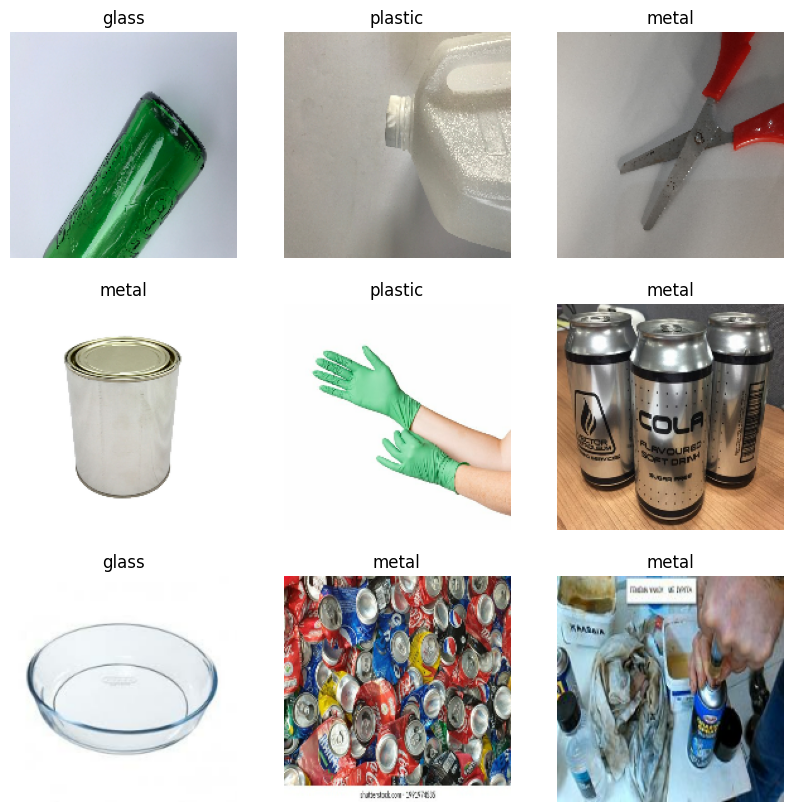

In [15]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        displayed_image = (image[i].numpy()).astype('uint8')  # MULTIPLY THE .NUMPY() TO 255.0
        plt.imshow(displayed_image)
        plt.title(data_cat[labels[i]])
        plt.axis('off')
plt.show()

In [16]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.layers import Input

from tensorflow.keras.layers import Rescaling
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, RandomContrast, RandomBrightness

In [17]:
# I PERSONALLY ADD THIS DATA AUGMENTATION
#from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom
#data_augmentation = Sequential([
 #   RandomFlip("horizontal"),
  #  RandomRotation(0.2),
   # RandomZoom(0.1),
#])

data_augmentation = Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.2),
    RandomZoom(0.1),
    RandomContrast(0.1),
    RandomBrightness(0.1),
    Rescaling(1./255)  # Normalize images to the range [0, 1]
])

In [18]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
# base_model.trainable = True
fine_tune_at = 50  # Unfreeze layers after 50
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [19]:
model = Sequential([
    Input(shape=(img_height, img_width, 3)),
    data_augmentation, # ADD THE DATA AUGMENTATION BEFORE THE PRE-TRAINED MODEL
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dense(len(data_cat), activation='softmax')  # Assuming a multi-class classification task
])

In [20]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# I ALSO CHANGED THIS, BUT I DON'T KNOW IF THERE'S CHANGES IN ITS PERFORMANCE

In [21]:
epochs_size = 30 # I INCREASED THE TRAINING SIZE
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/30
  4/112 ━━━━━━━━━━━━━━━━━━━━ 6:50 4s/step - accuracy: 0.3796 - loss: 1.1867

InvalidArgumentError: Graph execution error:

Detected at node decode_image/DecodeImage defined at (most recent call last):
<stack traces unavailable>
Detected at node decode_image/DecodeImage defined at (most recent call last):
<stack traces unavailable>
2 root error(s) found.
  (0) INVALID_ARGUMENT:  Unknown image file format. One of JPEG, PNG, GIF, BMP required.
	 [[{{node decode_image/DecodeImage}}]]
	 [[IteratorGetNext]]
	 [[IteratorGetNext/_2]]
  (1) INVALID_ARGUMENT:  Unknown image file format. One of JPEG, PNG, GIF, BMP required.
	 [[{{node decode_image/DecodeImage}}]]
	 [[IteratorGetNext]]
0 successful operations.
0 derived errors ignored. [Op:__inference_one_step_on_iterator_14324]

In [ ]:
epochs_range = range(epochs_size)
plt.figure(figsize=(12,6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

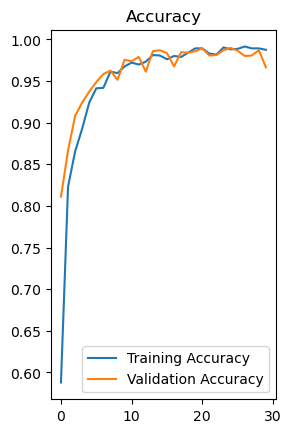

In [ ]:
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend(loc='lower right')

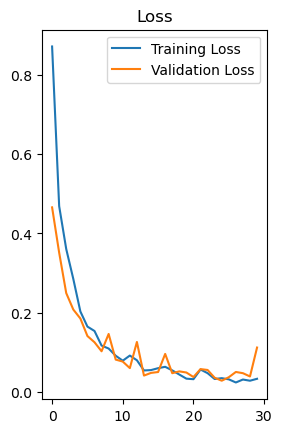

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend(loc='upper right')

plt.show()

In [ ]:

image_path = r'C:\Users\Russuel\JN\basedata\basedata\test\metal\metal103.jpg'
image = tf.keras.utils.load_img(image_path, target_size=(img_height,img_width))
image_array = tf.keras.utils.img_to_array(image)
random_angle = np.random.uniform(-np.pi / 12, np.pi / 12)
rotated_image = tf.image.rot90(image_array, k=int(random_angle // (np.pi / 2)))
flipped_image = tf.image.random_flip_left_right(rotated_image)

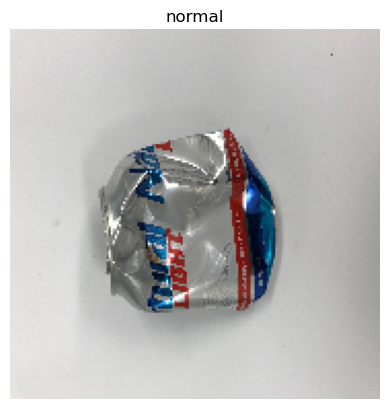

In [ ]:
plt.imshow(image_array.astype("uint8")) # predicting modified image
# plt.imshow(image_array.numpy().astype("uint8"))  # predicting modified image
plt.title('normal')
plt.axis('off')
plt.show()

In [ ]:
# normalized = image_array / 255.0
img_bat = tf.expand_dims(image_array, 0)
predict = model.predict(img_bat)
score = tf.nn.softmax(predict)

1/1 [==============================] - 0s 39ms/step


Trash in Image is metal with ACCURACY of 57.61%


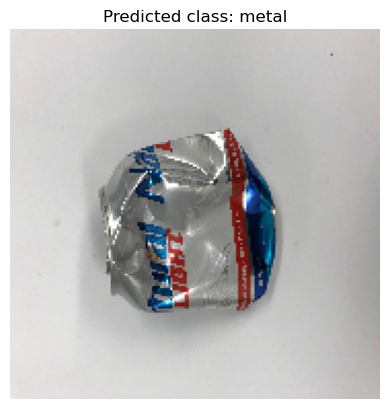

In [ ]:
print('Trash in Image is {} with ACCURACY of {:0.2f}%'.format(data_cat[np.argmax(score)], np.max(score)*100))

plt.figure(dpi=100)
plt.imshow(image_array.astype("uint8"))  # predicting non-modified image
# plt.imshow(rotated_image.numpy().astype("uint8"))  # predicting modified image
plt.title(f"Predicted class: {data_cat[np.argmax(score)]}")
plt.axis('off')
plt.show()

In [ ]:
import tensorflow_model_optimization as tfmot
print(tfmot.__file__)

C:\Users\Russuel\anaconda3\envs\gwithgpu\lib\site-packages\tensorflow_model_optimization\__init__.py


# **SAVE MODEL**

In [ ]:
model.save('./saved_model')

INFO:tensorflow:Assets written to: ./saved_model\assets


INFO:tensorflow:Assets written to: ./saved_model\assets


In [ ]:
import tensorflow as tf

model = tf.saved_model.load("./saved_model")

# Re-save the model in a format compatible with tfjs-node
tf.saved_model.save(model, "./savedModel")


INFO:tensorflow:Assets written to: ./savedModel\assets


INFO:tensorflow:Assets written to: ./savedModel\assets
